In [1]:
from new_utils import atari_env
from new_utils.atari_env.wrapper import AtariPreprocessing
from new_utils.draw_utils import ax_plot_img
import numpy as np

import gymnasium as gym
from gymnasium.spaces import Box
from gymnasium.wrappers import FrameStack, FlattenObservation, TimeLimit

import matplotlib.pyplot as plt
%matplotlib inline

objc[11336]: Class GLFWWindowDelegate is implemented in both /Users/jiangzhaoh/anaconda3/envs/bpref/lib/python3.9/site-packages/glfw/libglfw.3.dylib (0x114876810) and /Users/jiangzhaoh/.mujoco/mujoco210/bin/libglfw.3.dylib (0x127f5d700). One of the two will be used. Which one is undefined.
objc[11336]: Class GLFWApplicationDelegate is implemented in both /Users/jiangzhaoh/anaconda3/envs/bpref/lib/python3.9/site-packages/glfw/libglfw.3.dylib (0x1148767e8) and /Users/jiangzhaoh/.mujoco/mujoco210/bin/libglfw.3.dylib (0x127f5d778). One of the two will be used. Which one is undefined.
objc[11336]: Class GLFWContentView is implemented in both /Users/jiangzhaoh/anaconda3/envs/bpref/lib/python3.9/site-packages/glfw/libglfw.3.dylib (0x114876860) and /Users/jiangzhaoh/.mujoco/mujoco210/bin/libglfw.3.dylib (0x127f5d7a0). One of the two will be used. Which one is undefined.
objc[11336]: Class GLFWWindow is implemented in both /Users/jiangzhaoh/anaconda3/envs/bpref/lib/python3.9/site-packages/glfw/

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
cfg = {
    'env': {
        'env_name': 'breakout',
        'obs_type': 'img',
        'max_frames': 108000,
        'clip_reward': True,
        'terminal_on_life_loss': True,
        'fire_on_reset': True,
        'frame_stack': 4,
    },
}

In [4]:
def make_env(cfg, eval=False):
    # NOTE: do not change the order of wrappers, otherwise must check terminated/truncated/need_reset again carefully.
    env = gym.make(atari_env.ATARI_ENV[cfg['env']['env_name']][cfg['env']['obs_type']])
    # TimeLimit before AtariPreprocessing because AtariPreprocessing have frame_skip, but we set TimeLimit based on frames
    # FrameStack after AtariPreprocessing because FrameStack need t stack processed frames
    wrapped_env = FrameStack(AtariPreprocessing(TimeLimit(env,
                                                          max_episode_steps=cfg['env']['max_frames']),
                                                obs_type=cfg['env']['obs_type'],
                                                clip_reward=False if eval else cfg['env']['clip_reward'],
                                                terminal_on_life_loss=False if eval else cfg['env']['terminal_on_life_loss'],
                                                fire_on_reset=cfg['env']['fire_on_reset']),
                             num_stack=cfg['env']['frame_stack'])  # stacked_shape: (#frame, original_shape)
    if cfg['env']['obs_type'] == 'rom':
        wrapped_env = FlattenObservation(wrapped_env)
    # TODO: replace the score area with a constant black background on all games.
    #       On BeamRider we additionally blank out the enemy ship count,
    #       and on Enduro we blank out the speedometer.
    # TODO: consider how to deal with episodic end（no variable-length episode during training）
    return wrapped_env

In [5]:
env = make_env(cfg)
obs, info = env.reset()
action_meaning = env.unwrapped.get_action_meanings()

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


****** Fire on Reset ******
****** Total 4 Action Meanings ******
***  0 NOOP
***  1 FIRE
***  2 RIGHT
***  3 LEFT


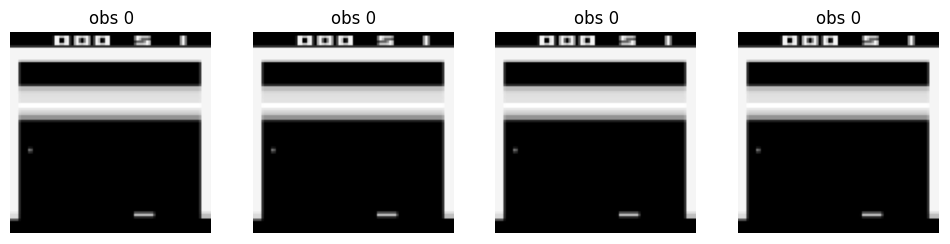

action 0 NOOP for step 1


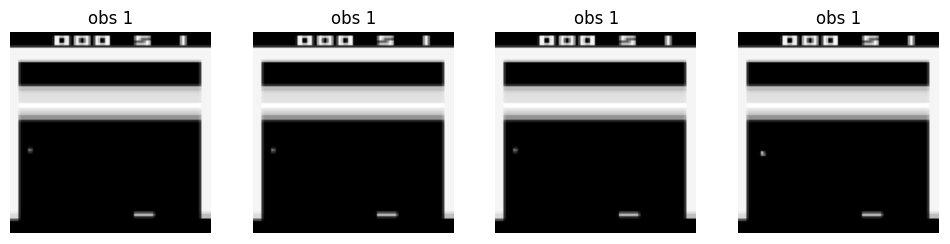

action 0 NOOP for step 2


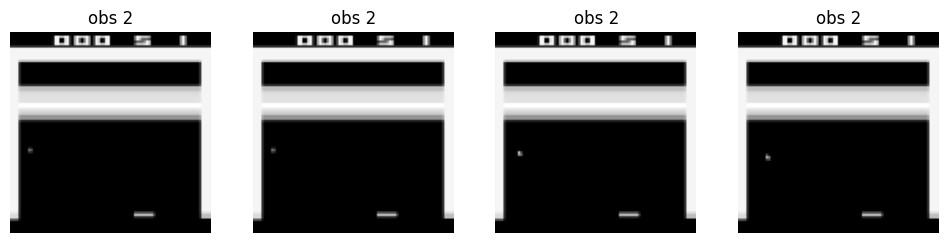

action 0 NOOP for step 3


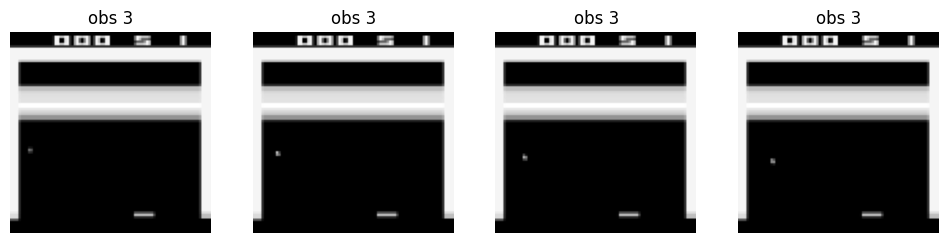

action 3 LEFT for step 4


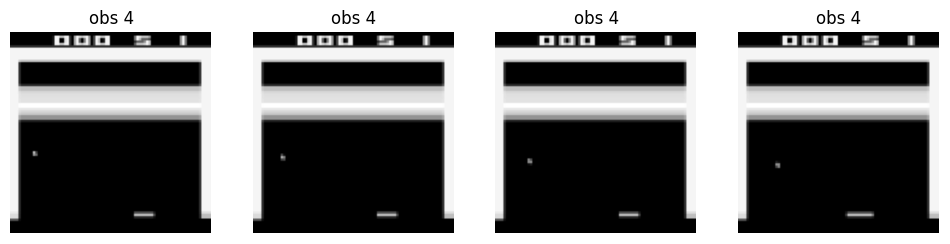

action 3 LEFT for step 5


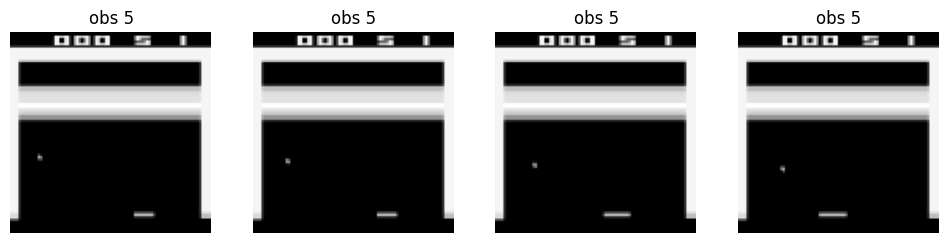

action 3 LEFT for step 6


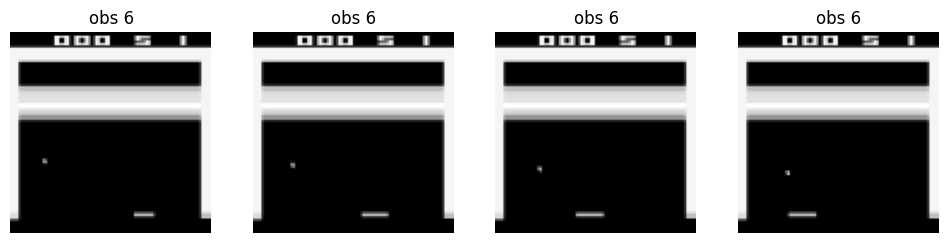

action 2 RIGHT for step 7


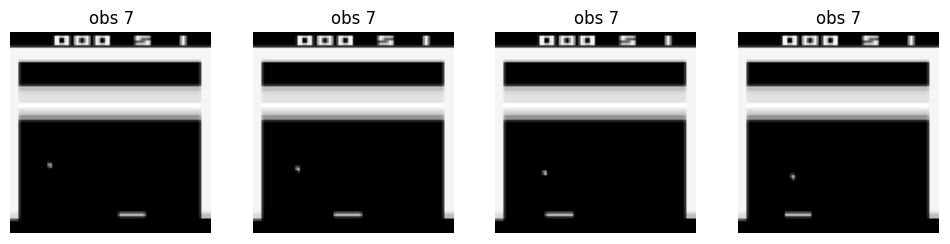

action 2 RIGHT for step 8


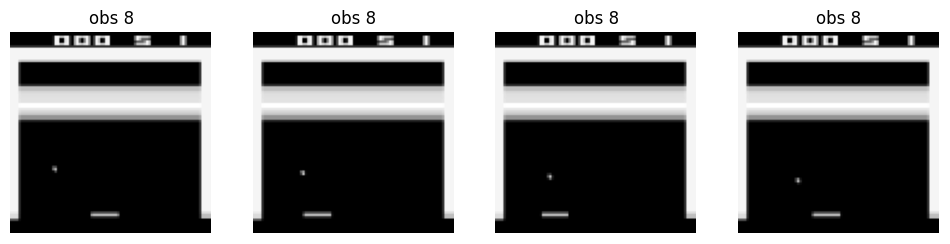

action 3 LEFT for step 9


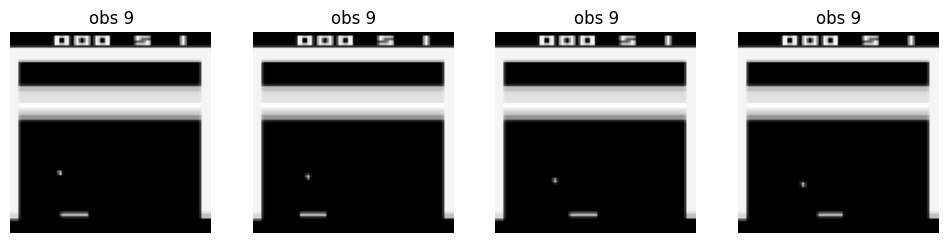

action 3 LEFT for step 10


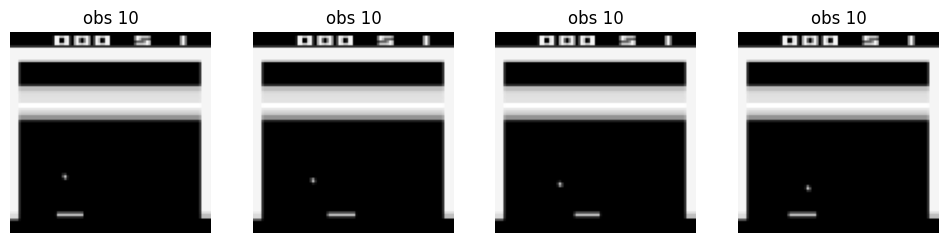

action 2 RIGHT for step 11


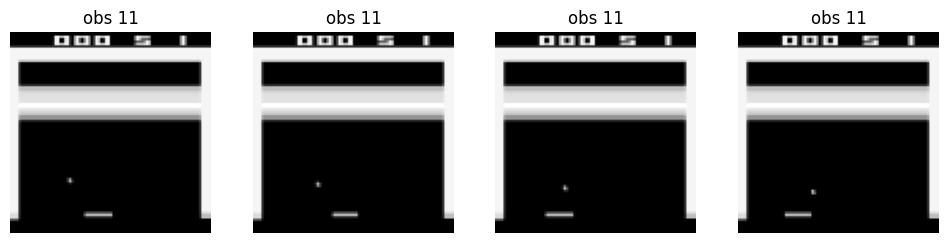

action 2 RIGHT for step 12


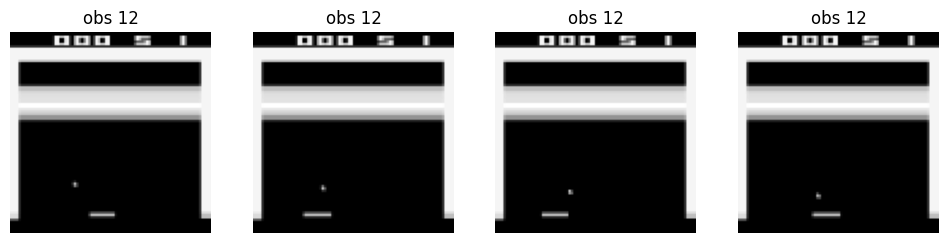

action 0 NOOP for step 13


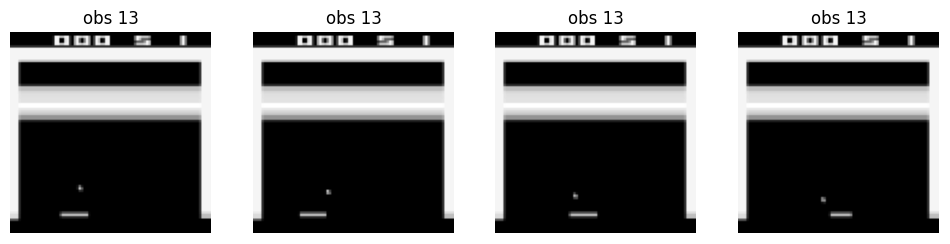

action 3 LEFT for step 14


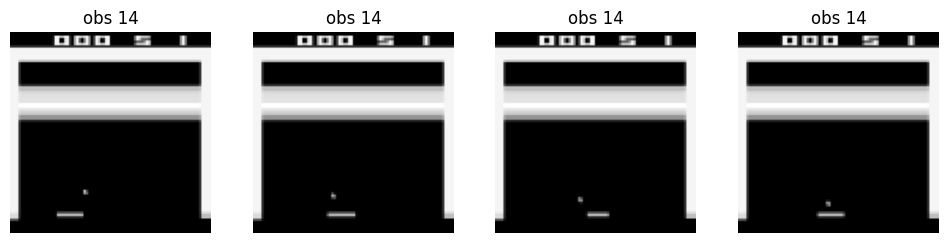

action 0 NOOP for step 15


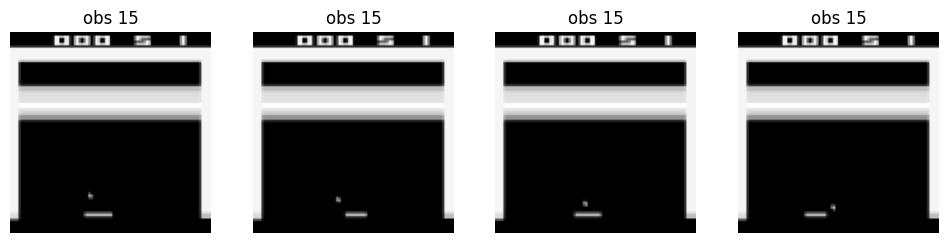

action 2 RIGHT for step 16


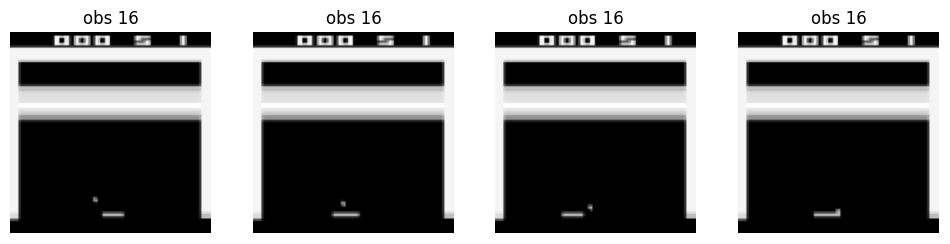

action 0 NOOP for step 17


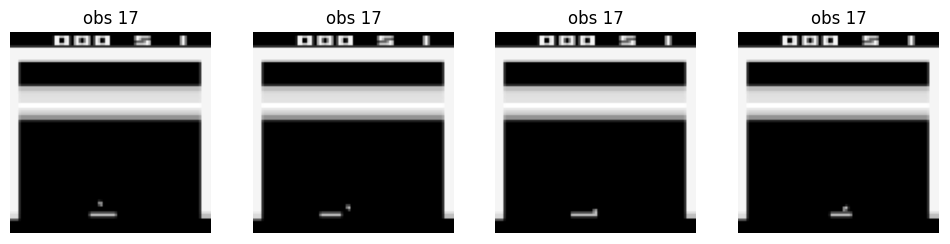

action 0 NOOP for step 18


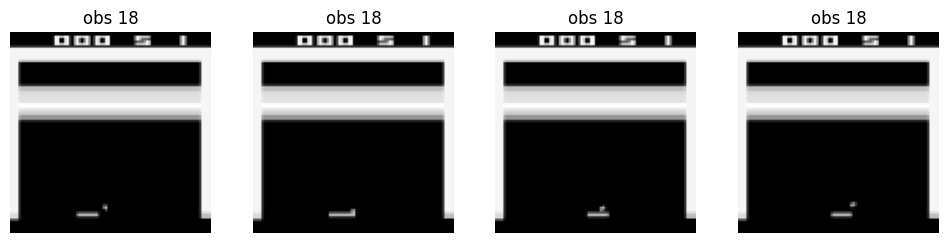

action 0 NOOP for step 19


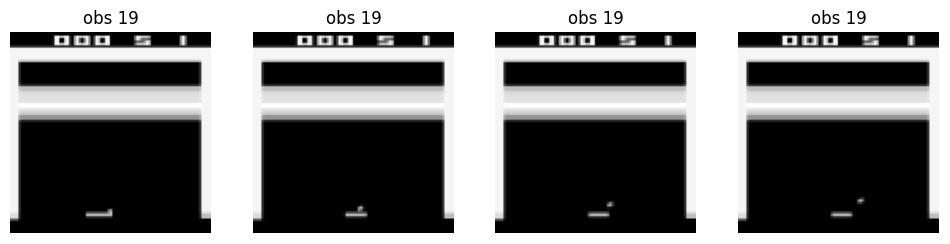

action 0 NOOP for step 20


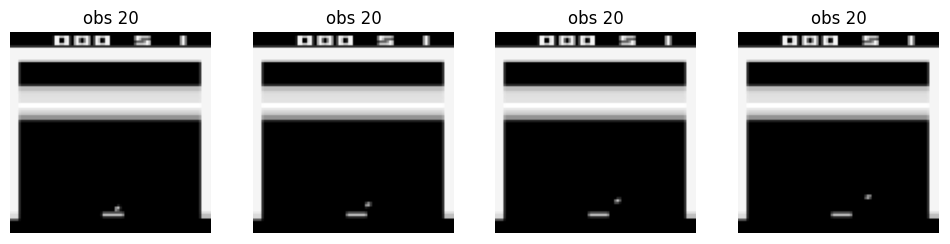

action 0 NOOP for step 21


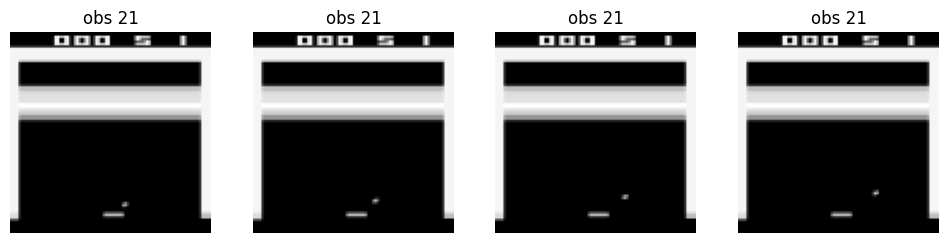

action 0 NOOP for step 22


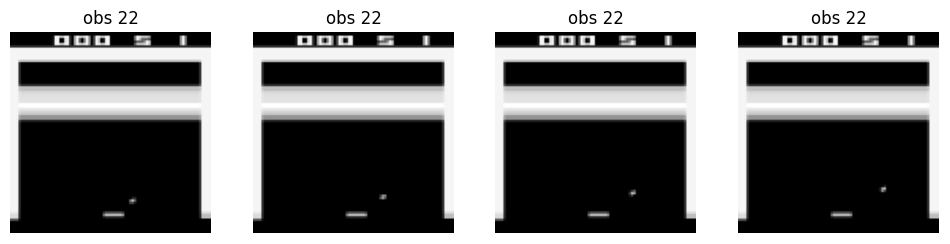

action 0 NOOP for step 23


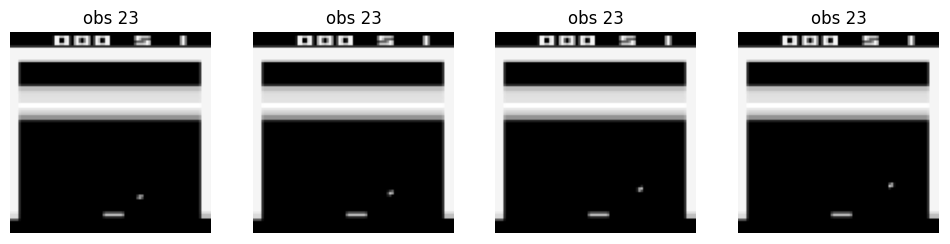

action 0 NOOP for step 24


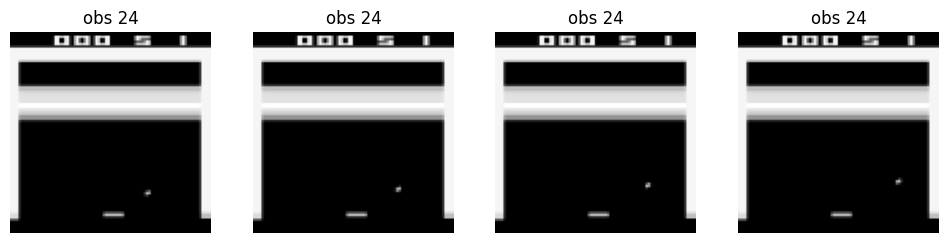

action 0 NOOP for step 25


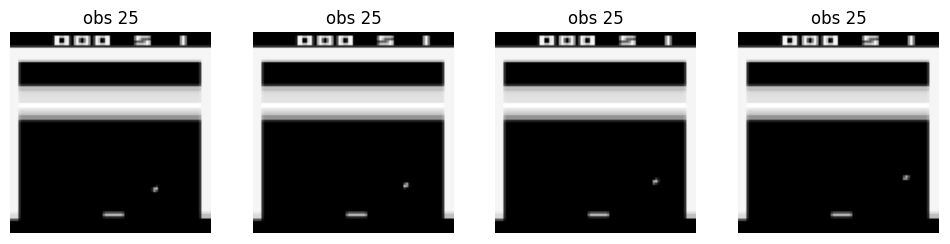

action 0 NOOP for step 26


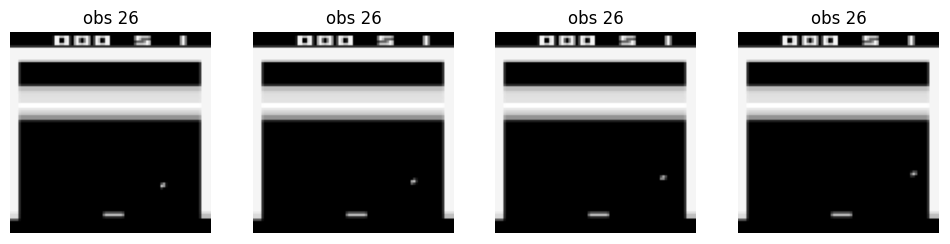

action 0 NOOP for step 27


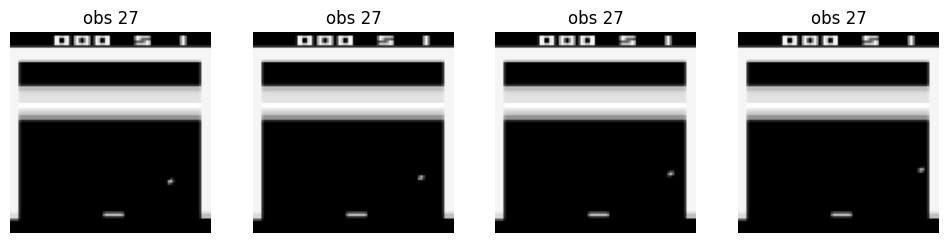

action 0 NOOP for step 28


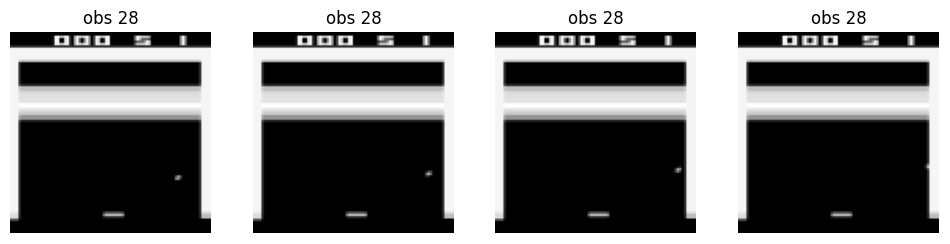

action 0 NOOP for step 29


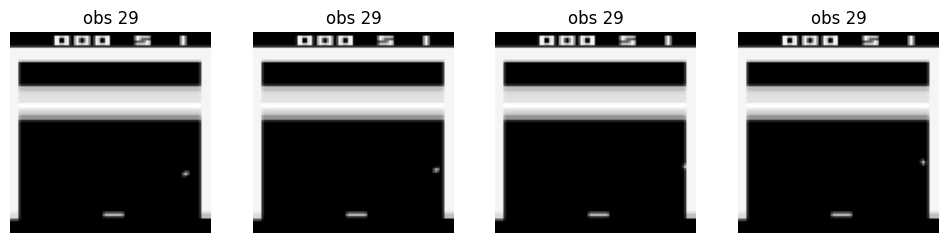

action 0 NOOP for step 30


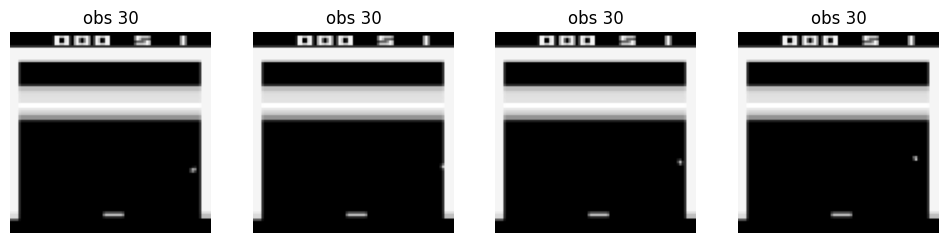

action 0 NOOP for step 31


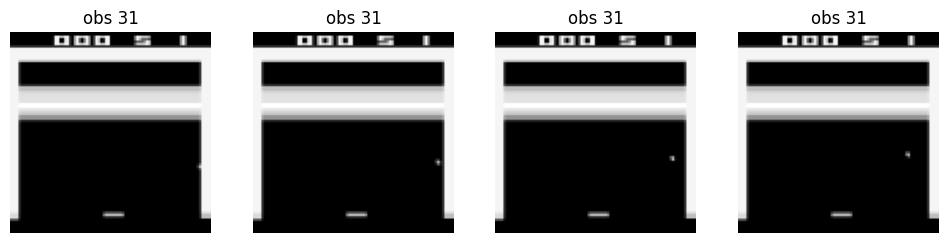

action 0 NOOP for step 32


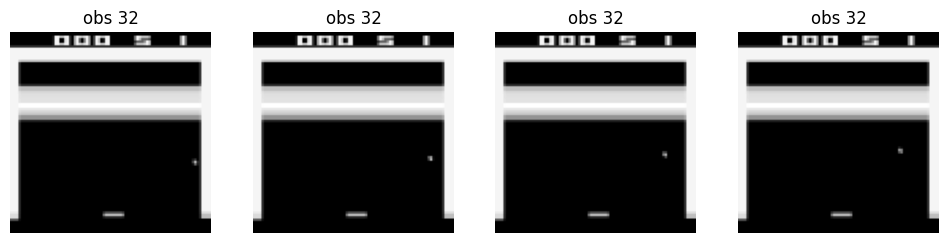

action 0 NOOP for step 33


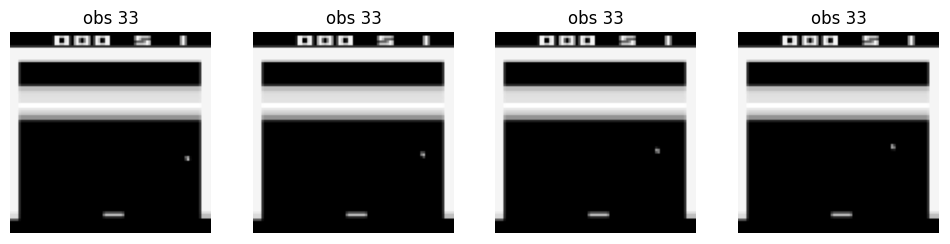

action 0 NOOP for step 34


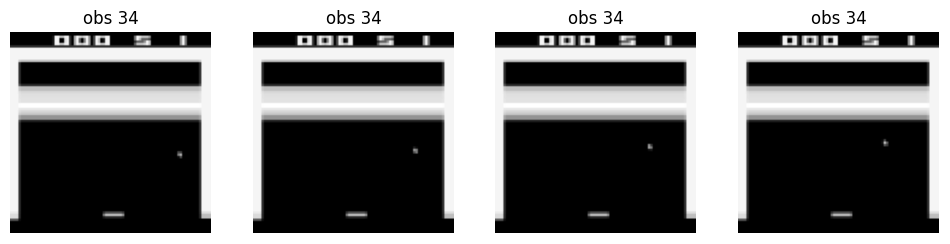

action 0 NOOP for step 35


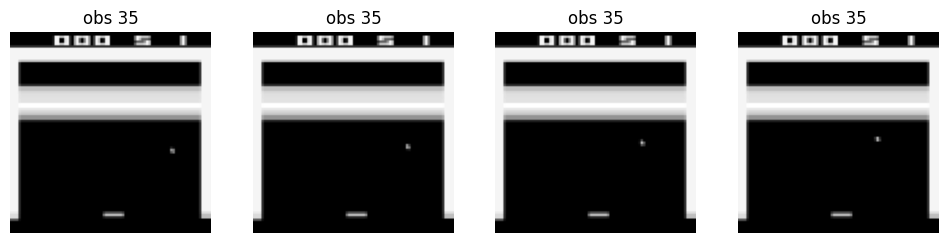

action 0 NOOP for step 36


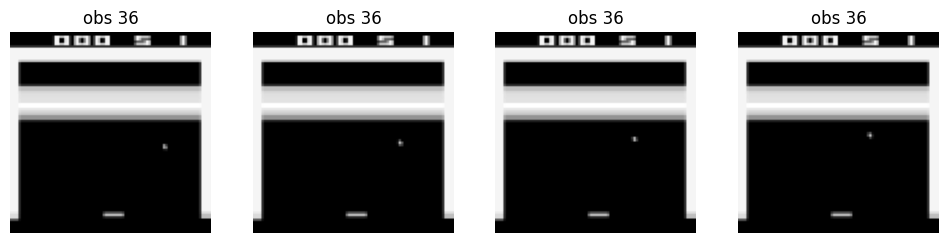

action 0 NOOP for step 37


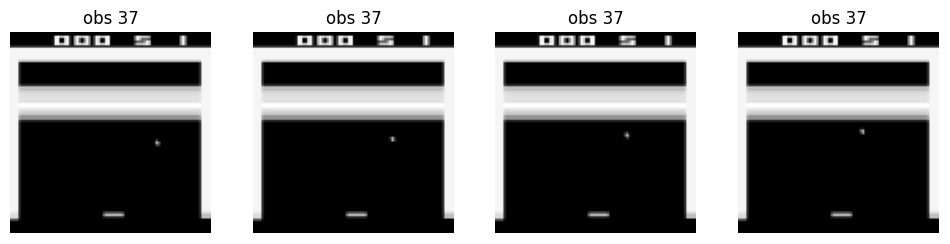

action 0 NOOP for step 38


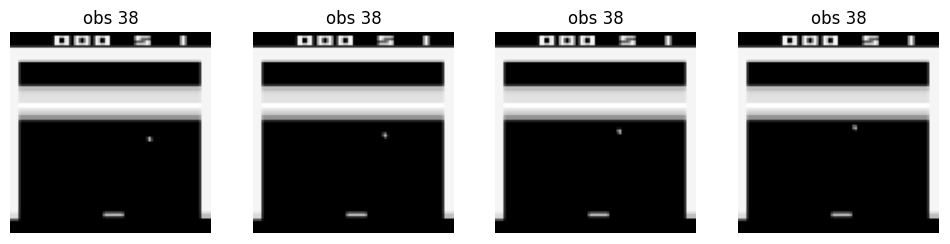

action 0 NOOP for step 39


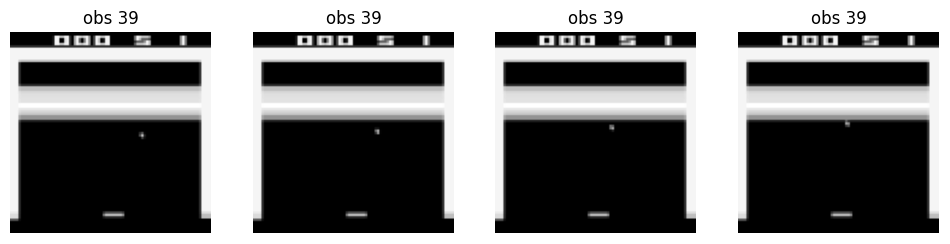

action 0 NOOP for step 40


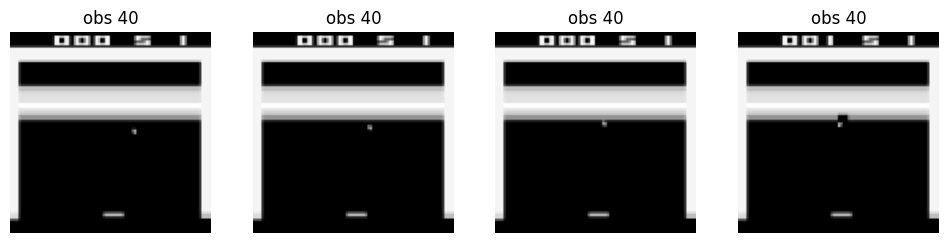

action 0 NOOP for step 41


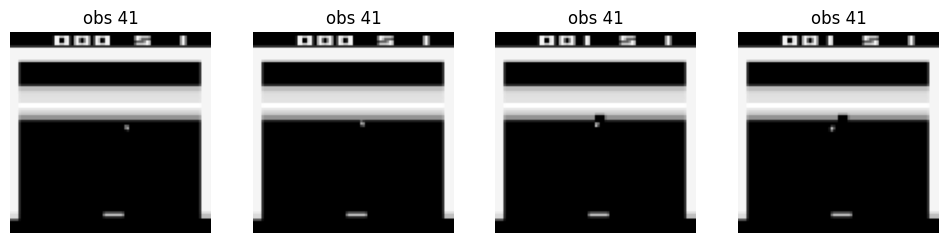

action 0 NOOP for step 42


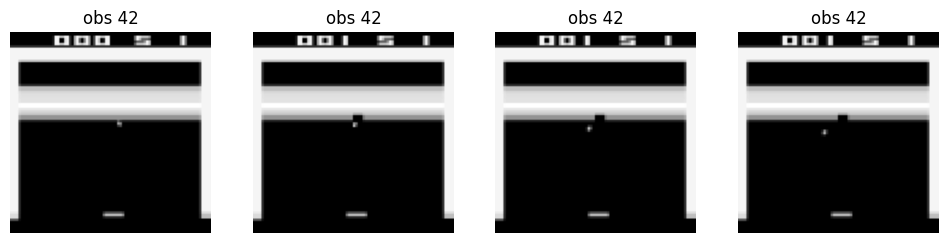

action 0 NOOP for step 43


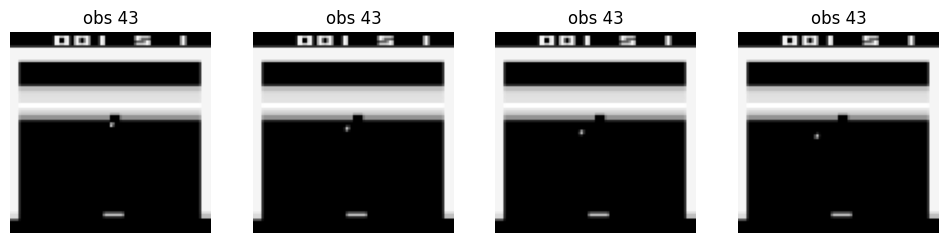

action 0 NOOP for step 44


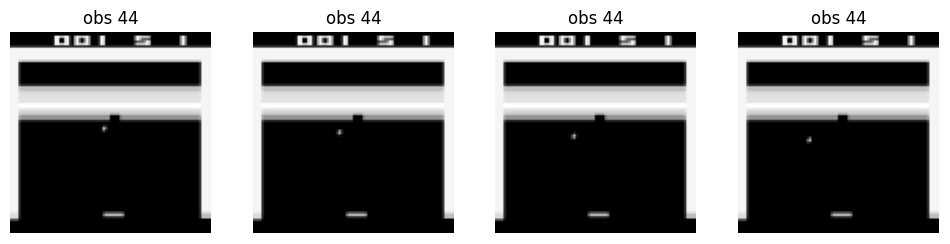

action 0 NOOP for step 45


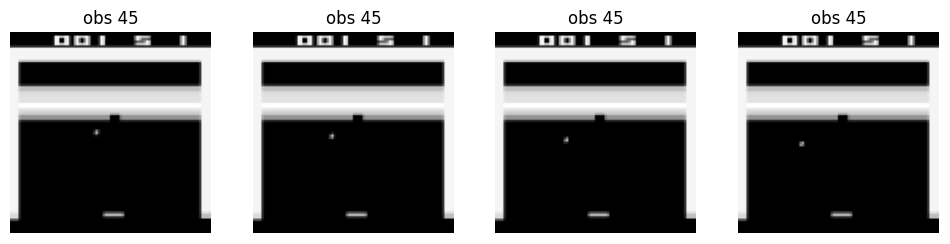

action 0 NOOP for step 46


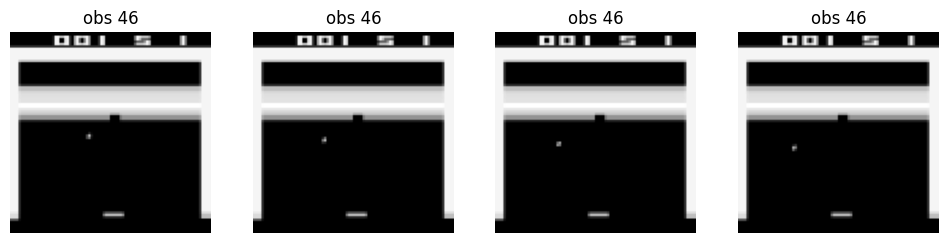

action 0 NOOP for step 47


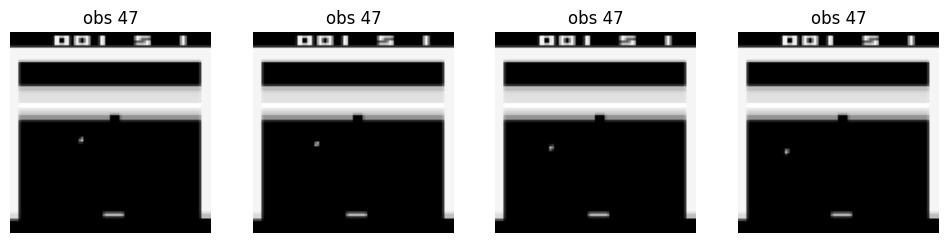

action 0 NOOP for step 48


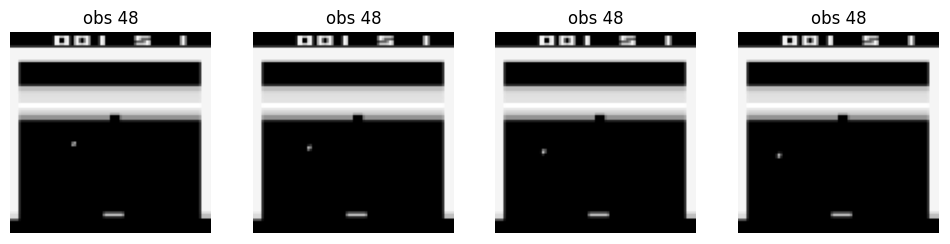

action 0 NOOP for step 49


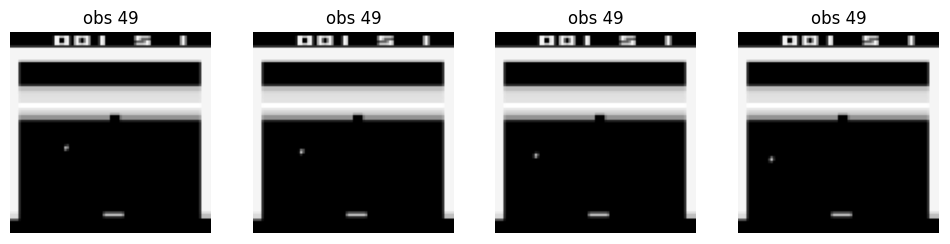

action 0 NOOP for step 50


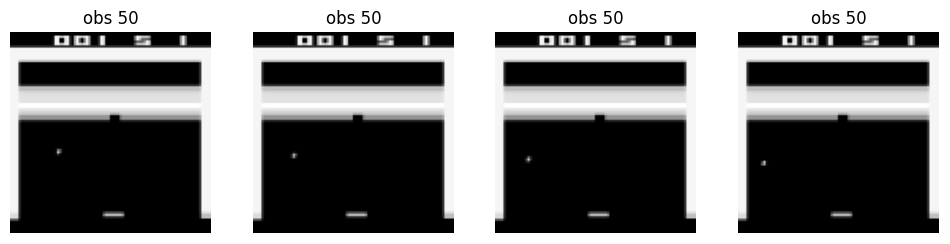

action 0 NOOP for step 51


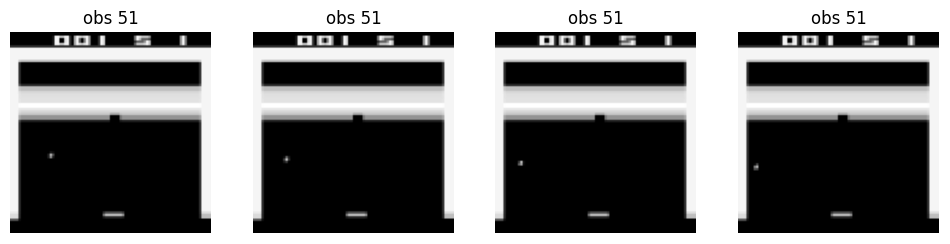

action 0 NOOP for step 52


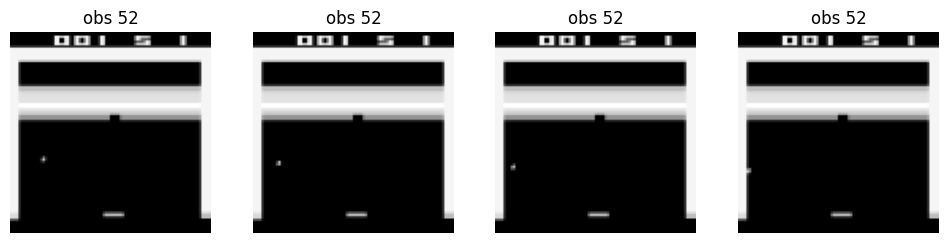

action 0 NOOP for step 53


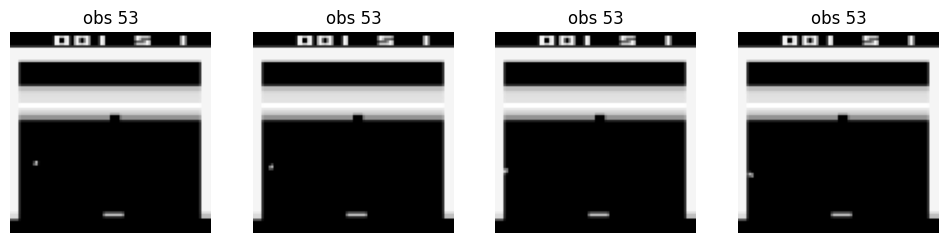

action 0 NOOP for step 54


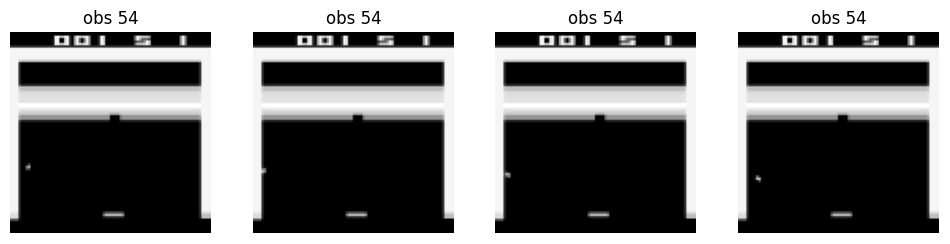

action 0 NOOP for step 55


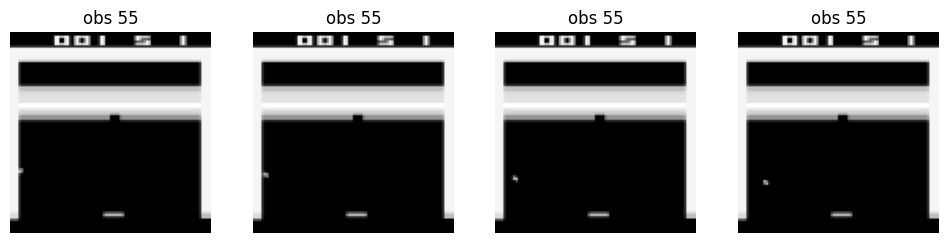

action 0 NOOP for step 56


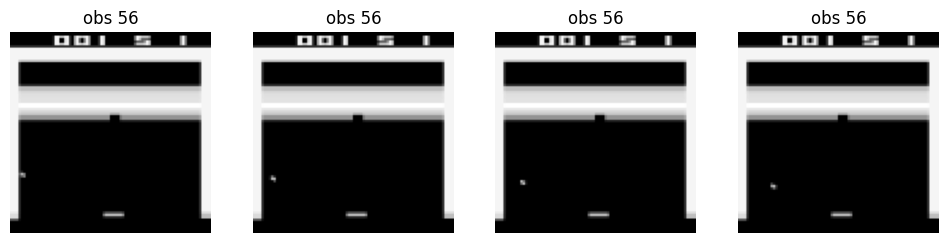

action 0 NOOP for step 57


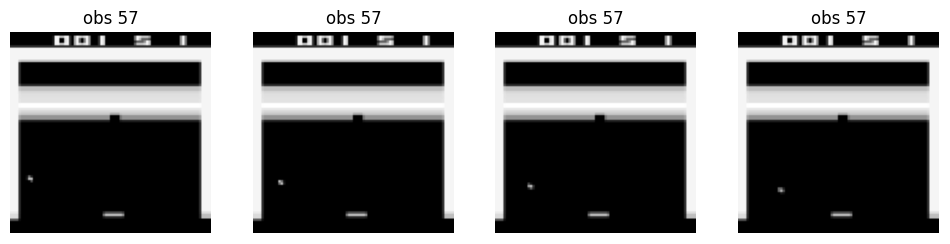

action 0 NOOP for step 58


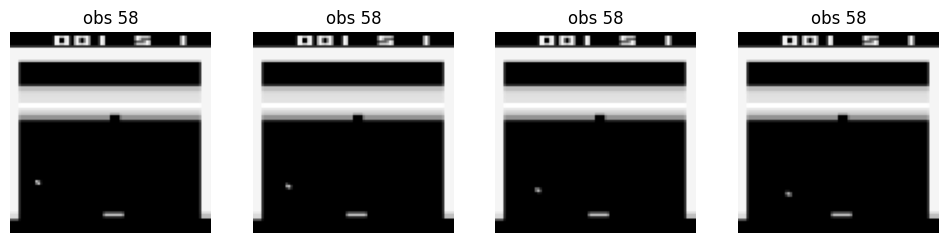

action 0 NOOP for step 59


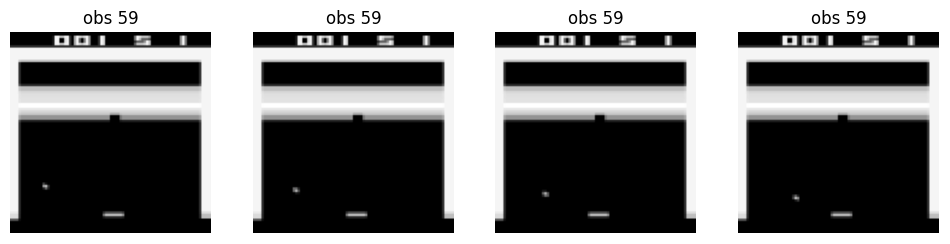

action 0 NOOP for step 60


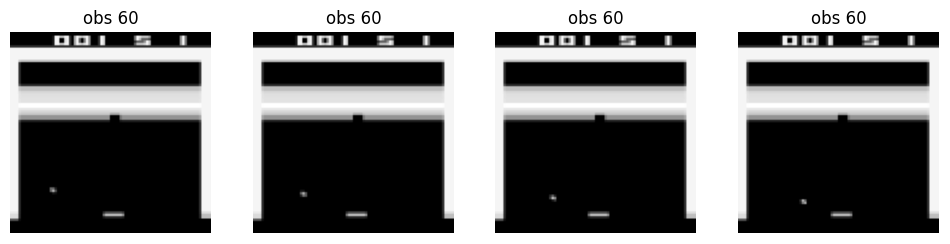

action 0 NOOP for step 61


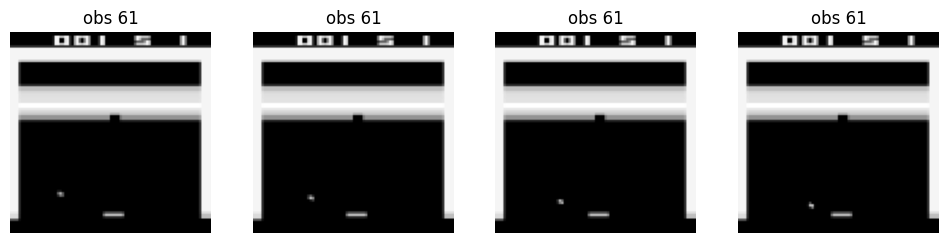

action 0 NOOP for step 62


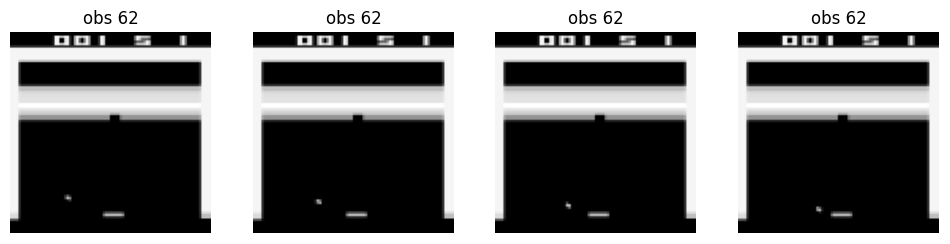

action 0 NOOP for step 63


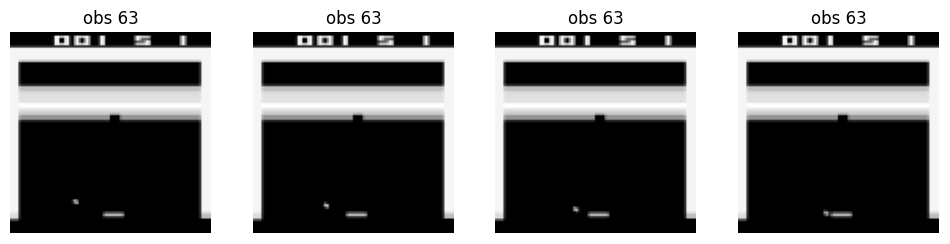

action 0 NOOP for step 64


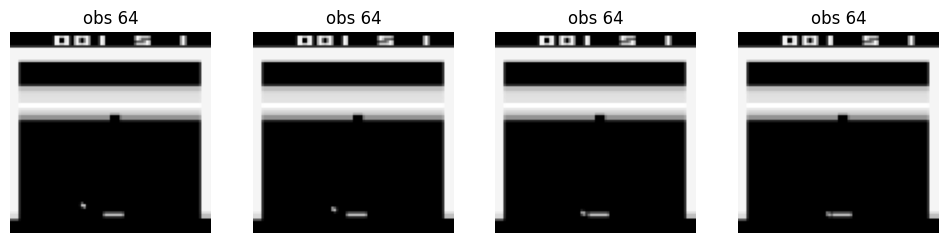

action 0 NOOP for step 65


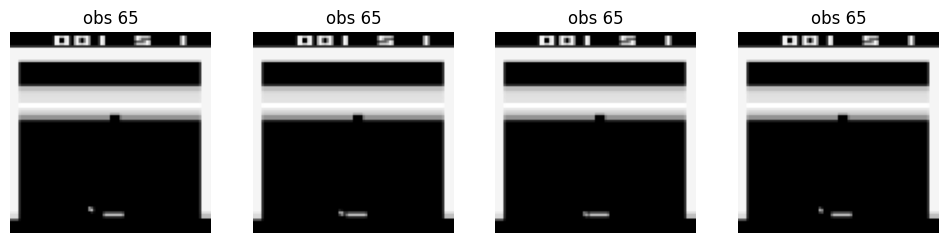

action 0 NOOP for step 66


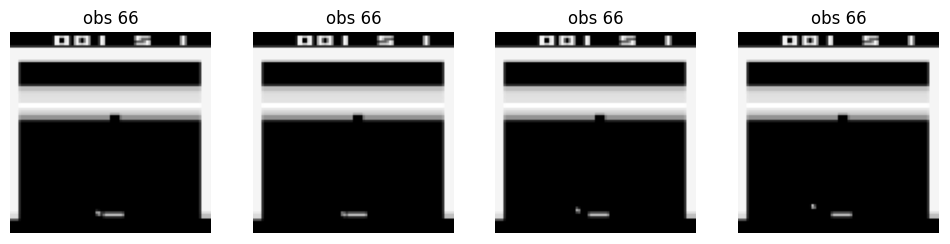

action 0 NOOP for step 67


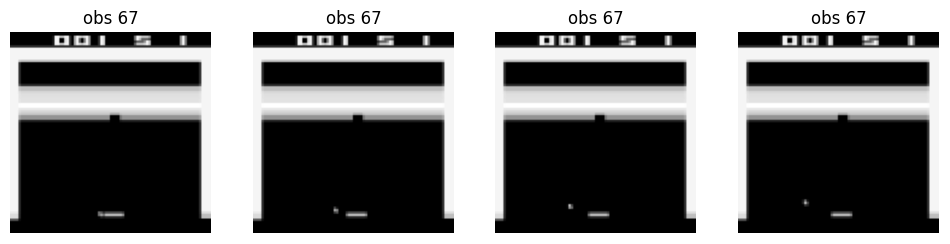

action 0 NOOP for step 68


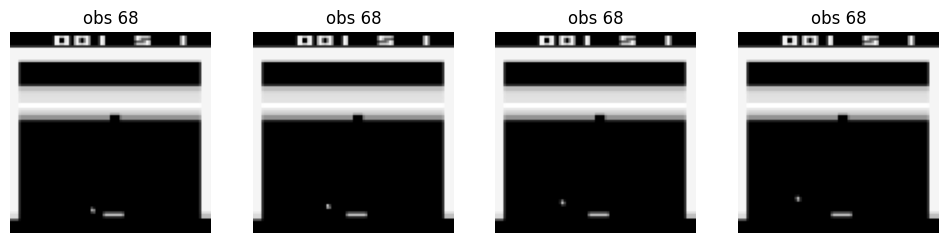

action 0 NOOP for step 69


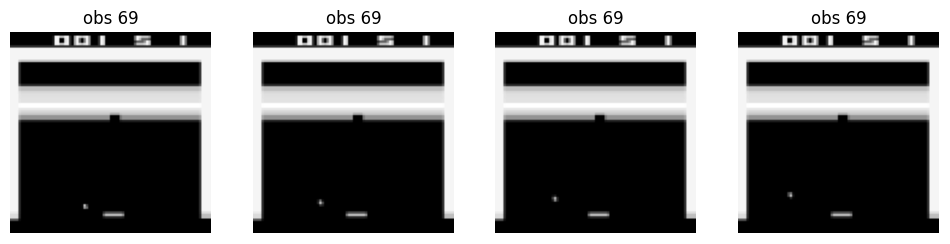

action 0 NOOP for step 70


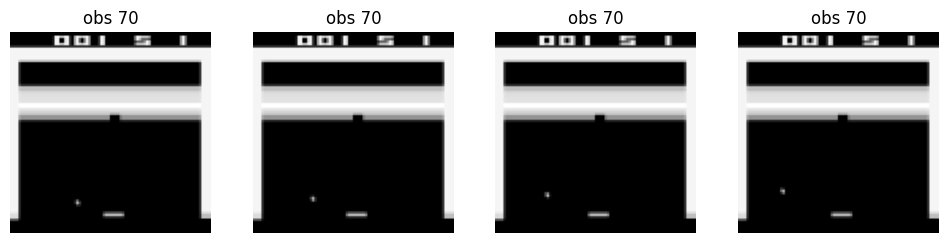

action 0 NOOP for step 71


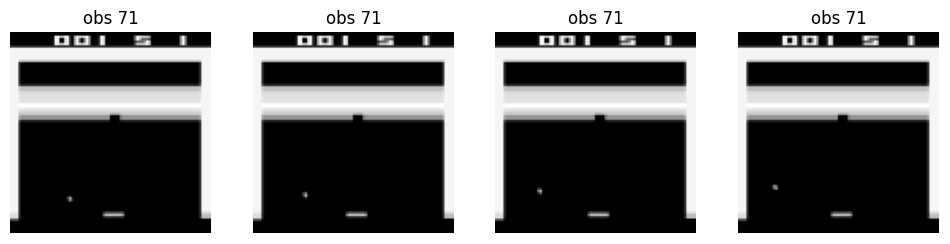

action 0 NOOP for step 72


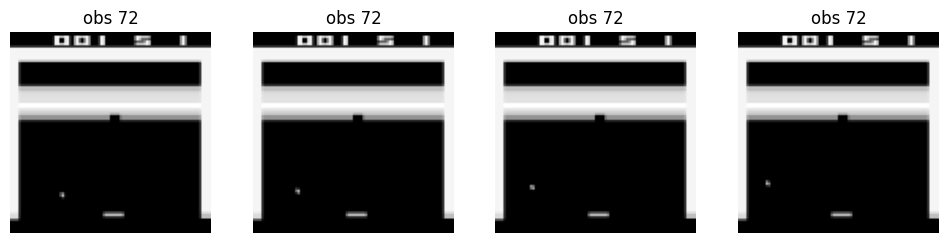

action 0 NOOP for step 73


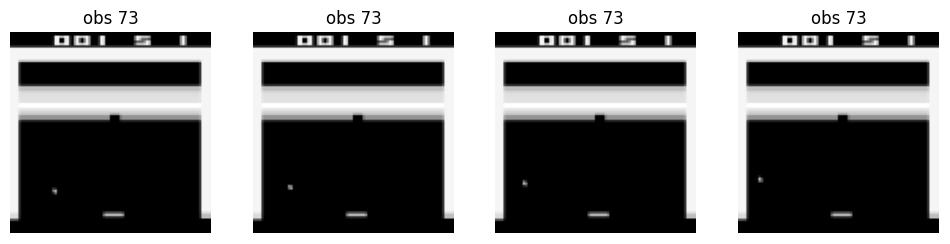

action 0 NOOP for step 74


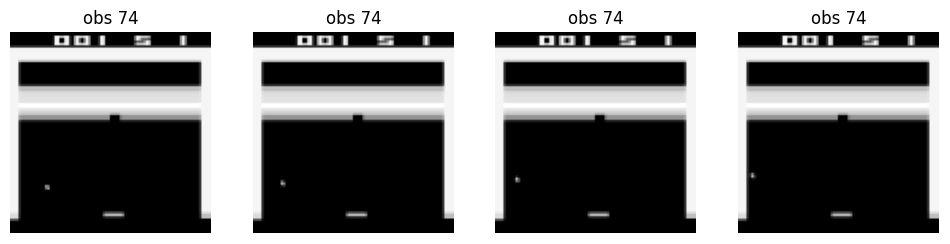

action 0 NOOP for step 75


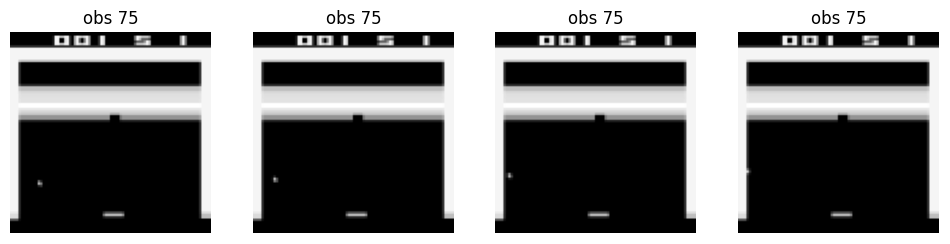

action 0 NOOP for step 76


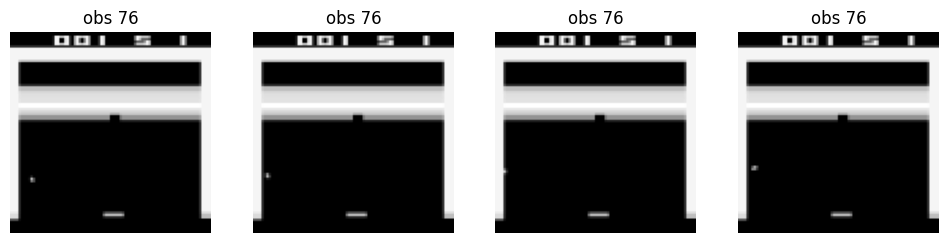

action 0 NOOP for step 77


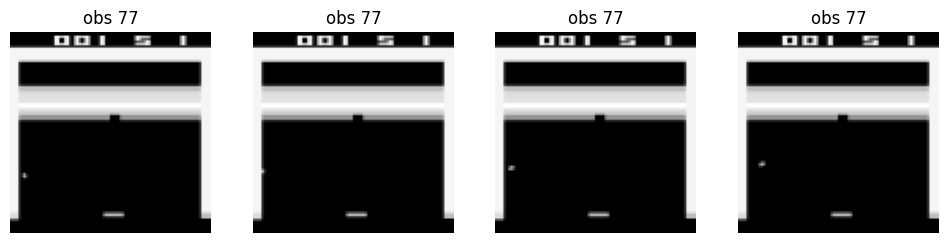

action 0 NOOP for step 78


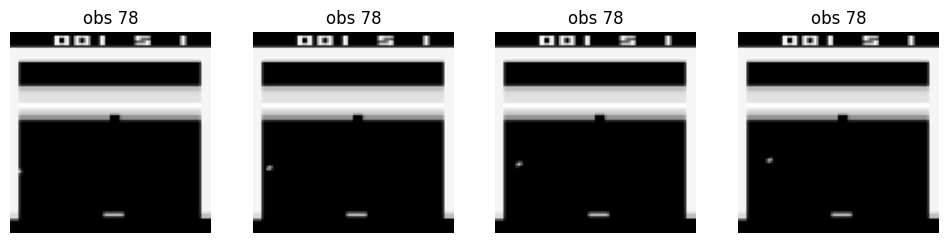

action 0 NOOP for step 79


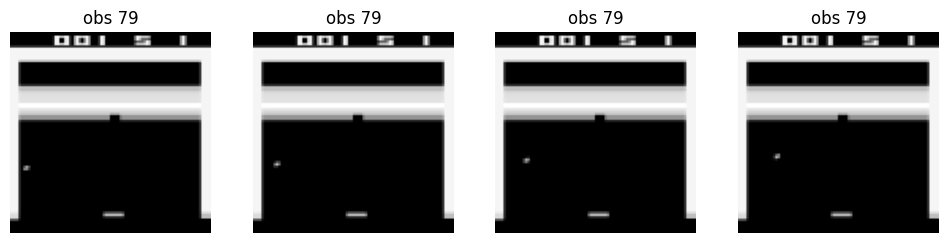

action 0 NOOP for step 80


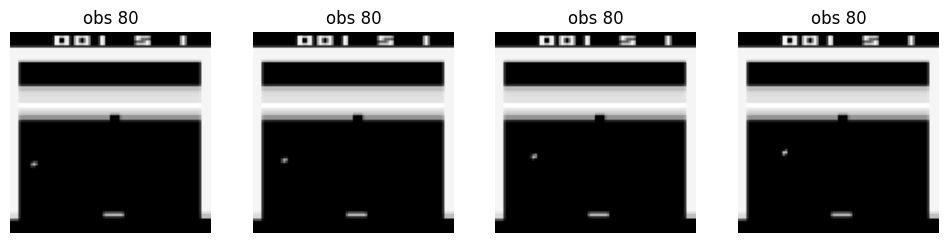

action 0 NOOP for step 81


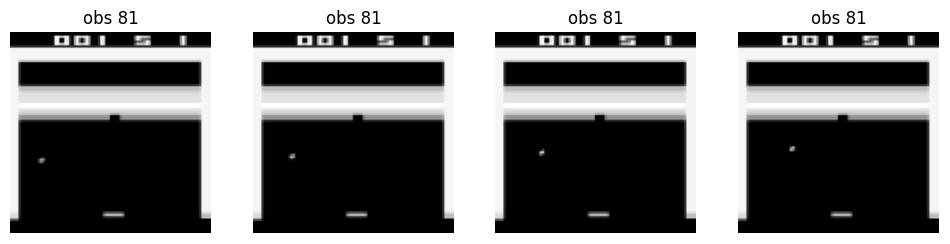

action 0 NOOP for step 82


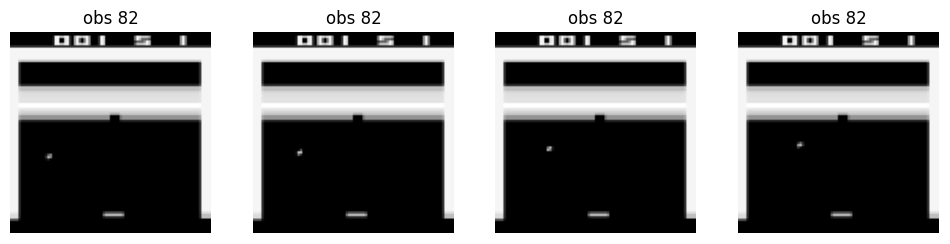

action 0 NOOP for step 83


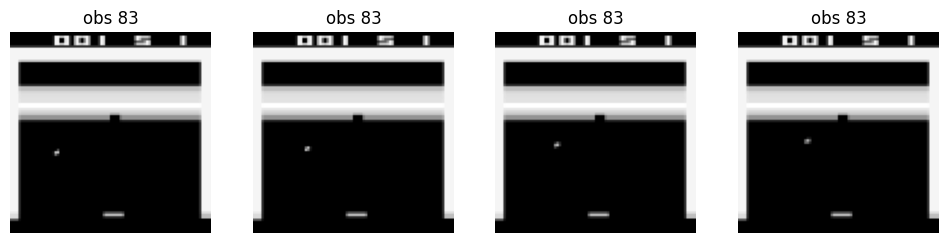

action 0 NOOP for step 84


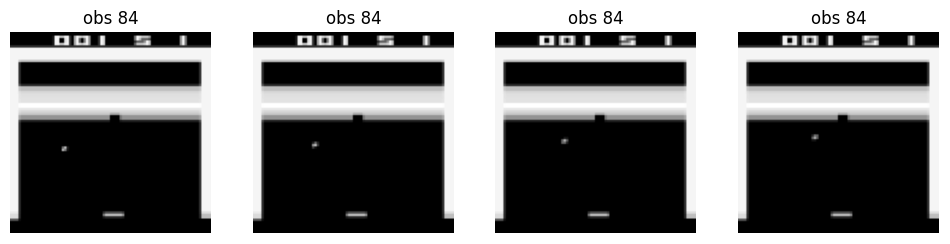

action 0 NOOP for step 85


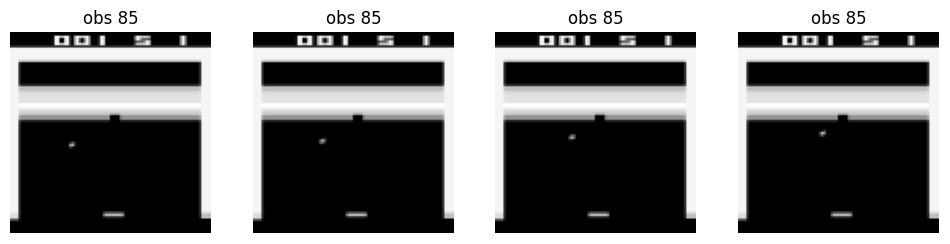

action 0 NOOP for step 86


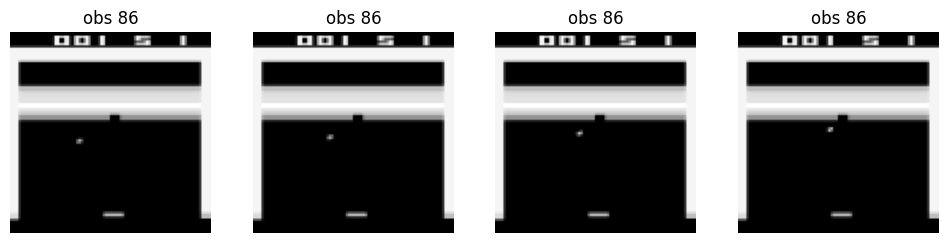

action 0 NOOP for step 87


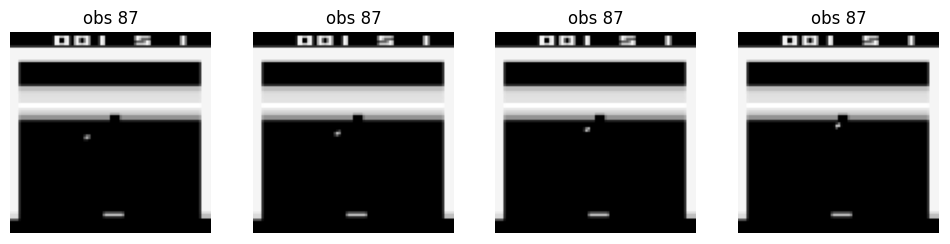

action 0 NOOP for step 88


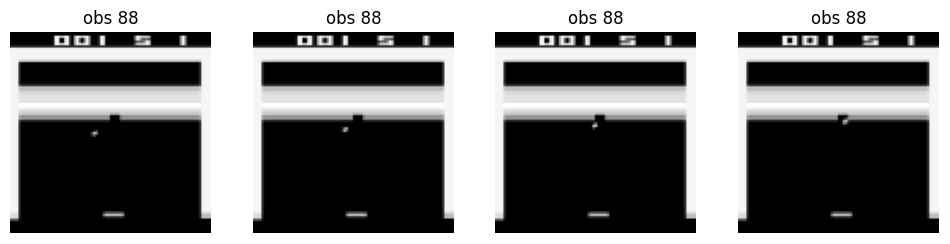

action 0 NOOP for step 89


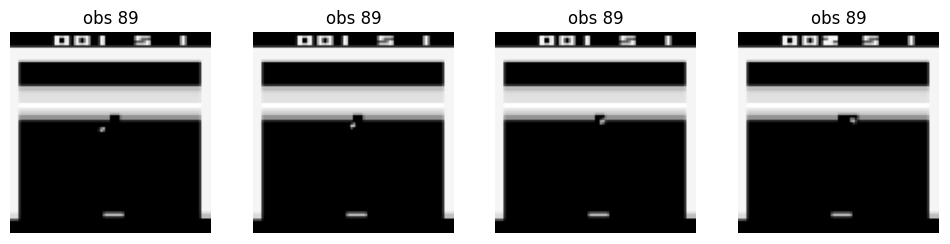

action 0 NOOP for step 90


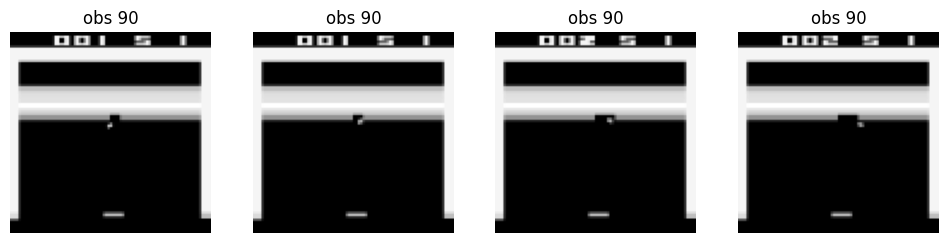

action 0 NOOP for step 91


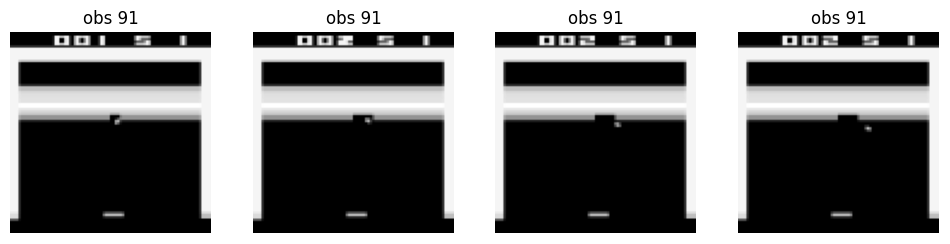

action 0 NOOP for step 92


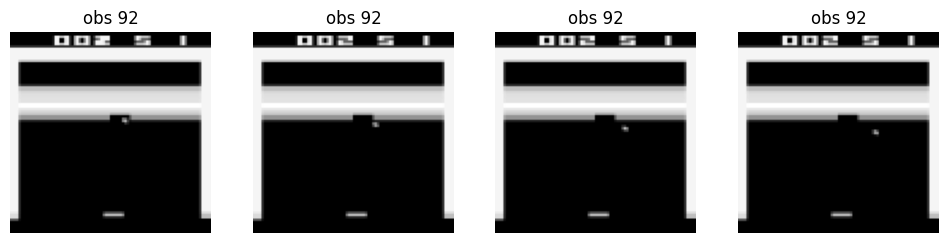

action 0 NOOP for step 93


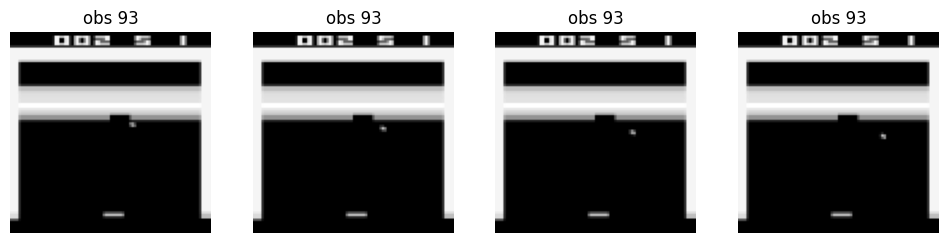

action 0 NOOP for step 94


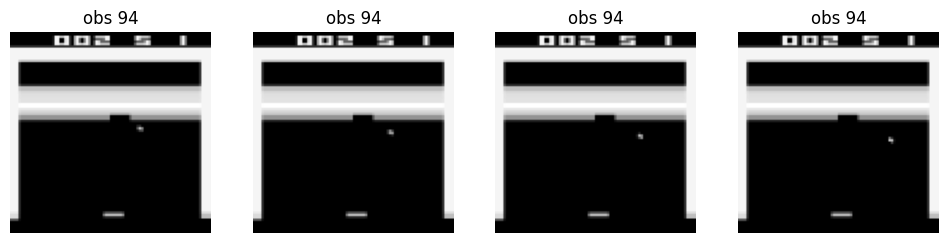

action 0 NOOP for step 95


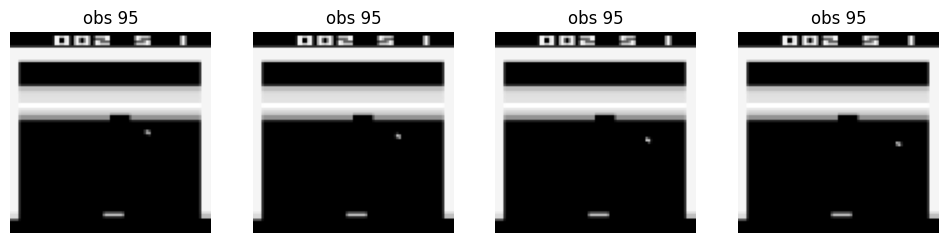

action 0 NOOP for step 96


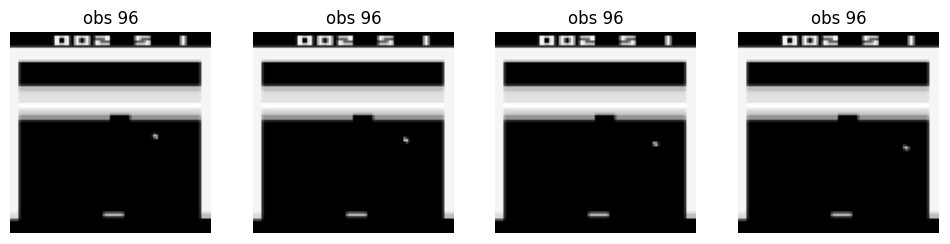

action 0 NOOP for step 97


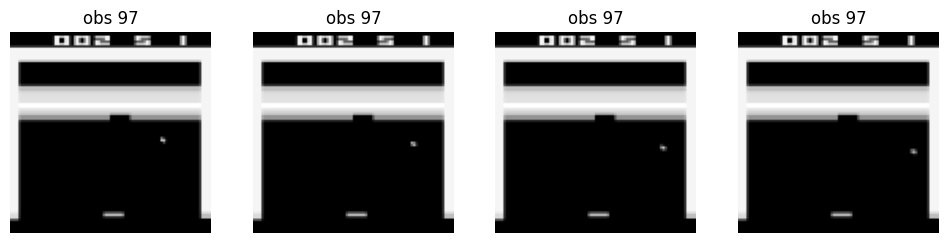

action 0 NOOP for step 98


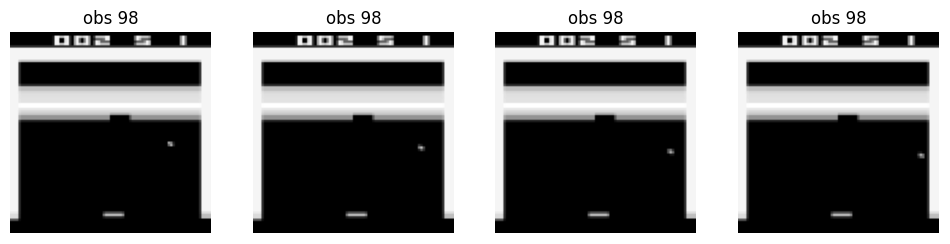

action 0 NOOP for step 99


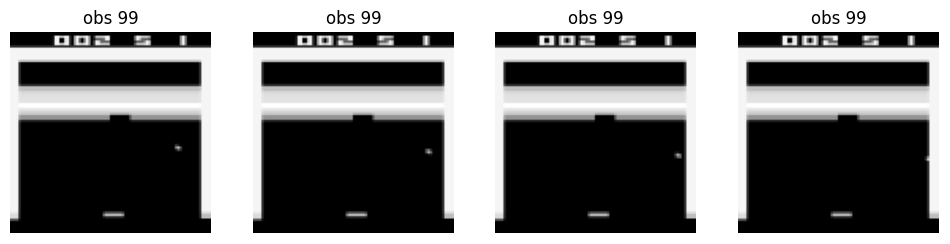

action 0 NOOP for step 100


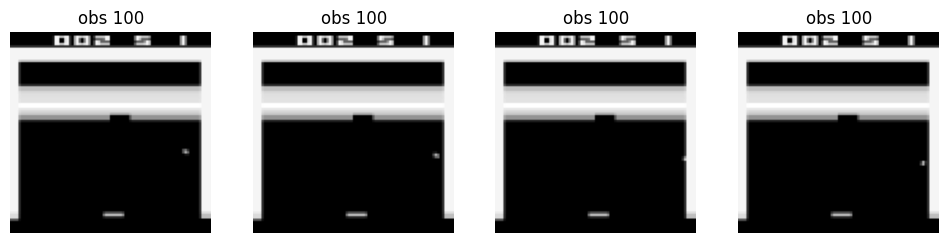

action 0 NOOP for step 101


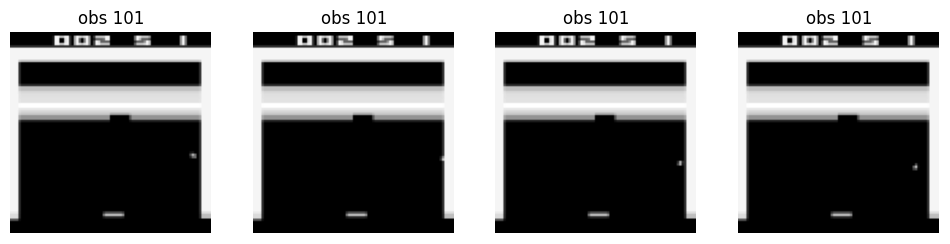

action 0 NOOP for step 102


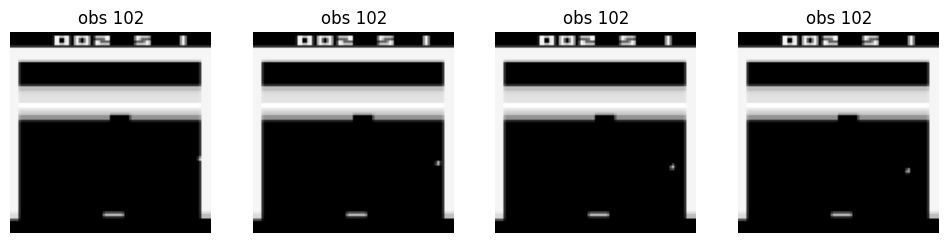

action 0 NOOP for step 103


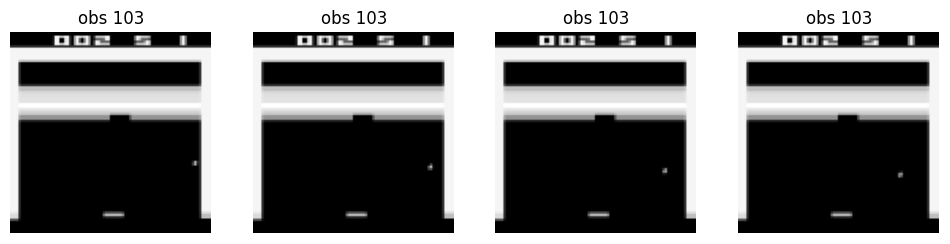

action 0 NOOP for step 104


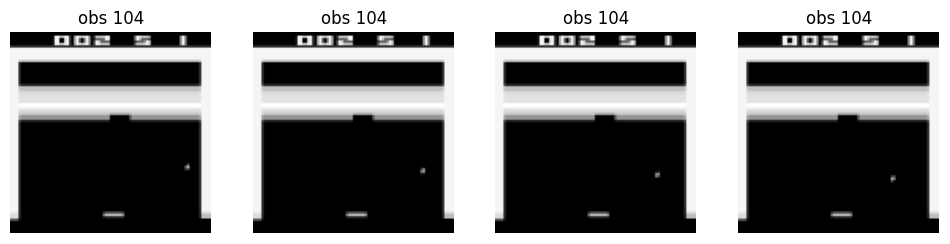

action 0 NOOP for step 105


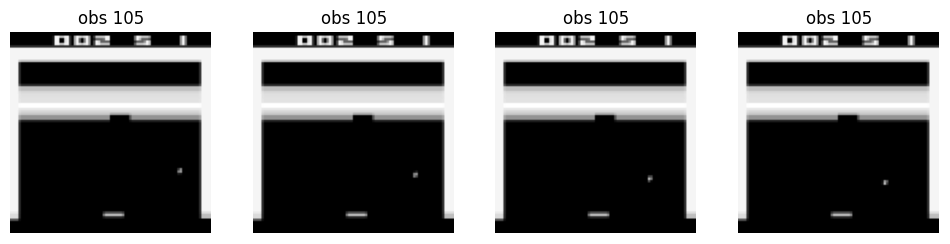

action 0 NOOP for step 106


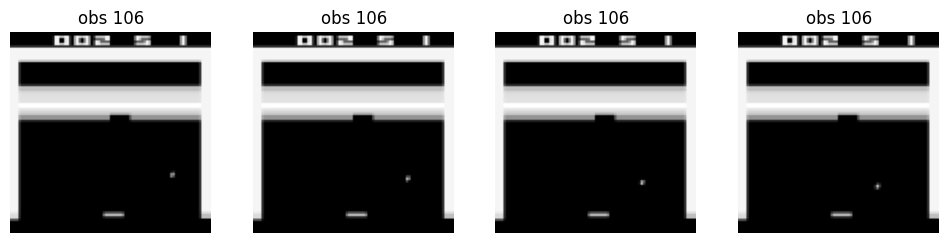

action 0 NOOP for step 107


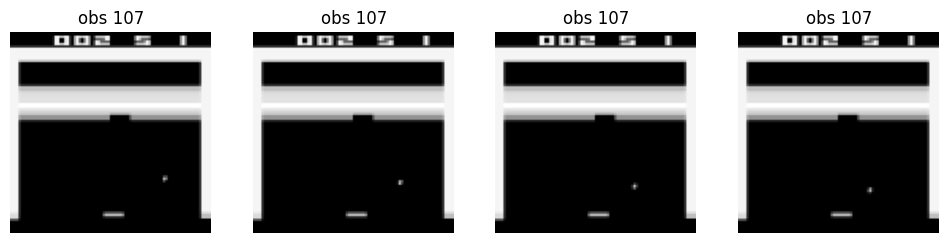

action 0 NOOP for step 108


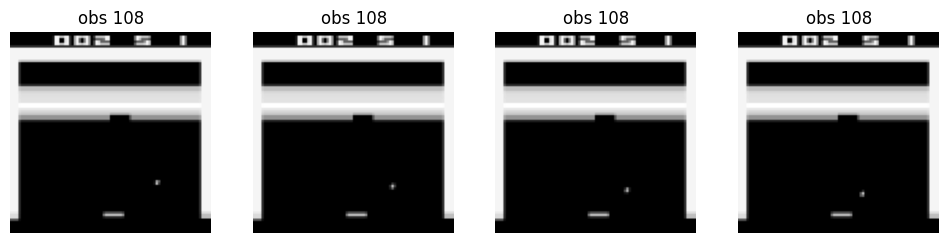

action 0 NOOP for step 109


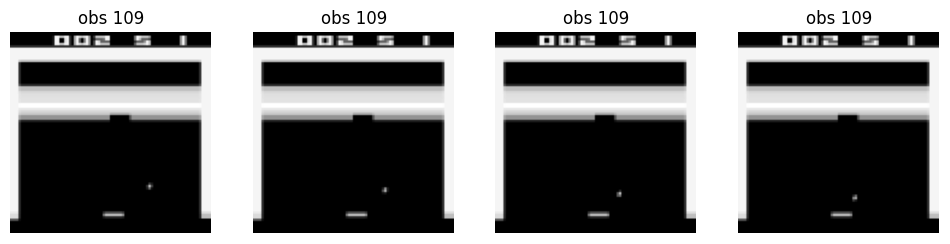

action 2 RIGHT for step 110


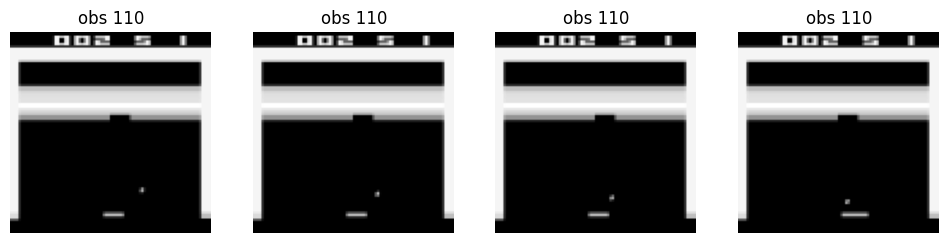

action 2 RIGHT for step 111


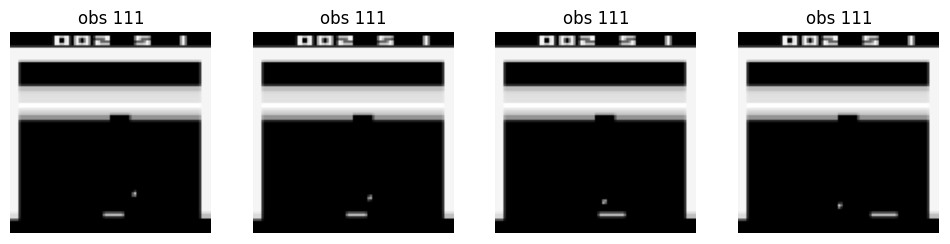

action 0 NOOP for step 112


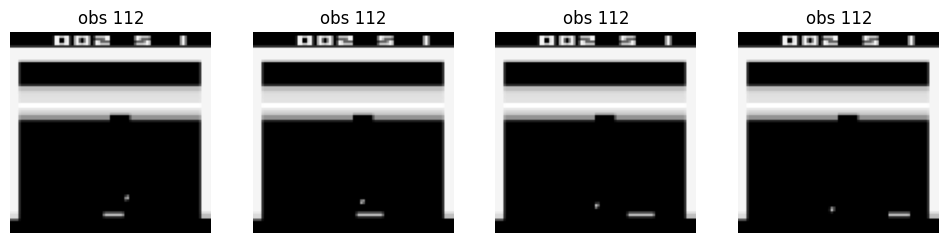

action 0 NOOP for step 113


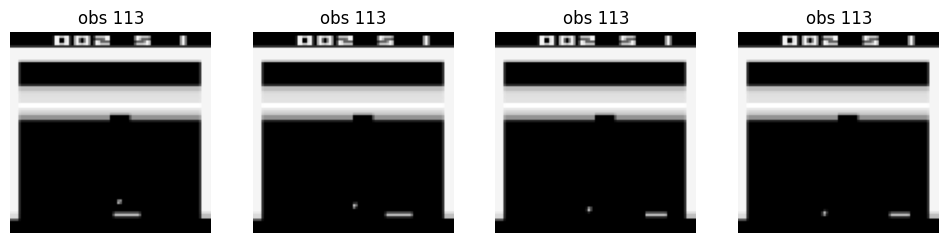

action 0 NOOP for step 114


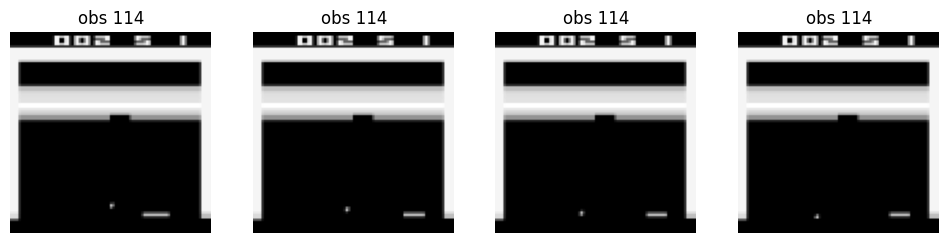

action 0 NOOP for step 115


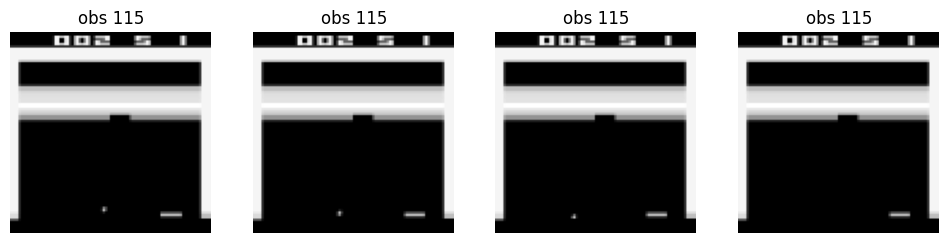

action 0 NOOP for step 116


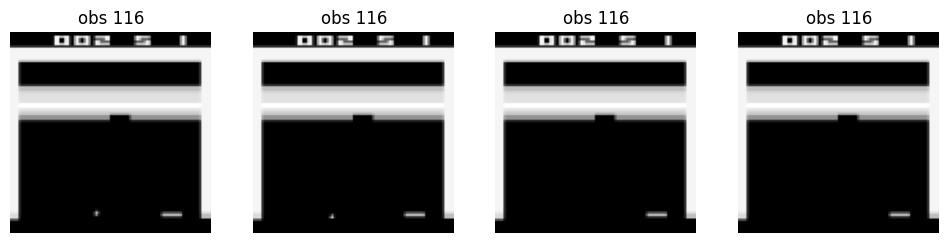

action 0 NOOP for step 117


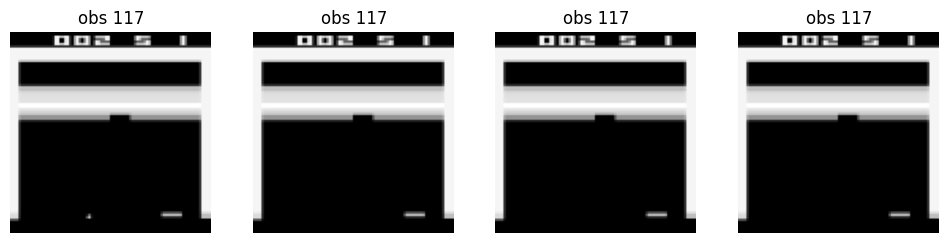

action 0 NOOP for step 118


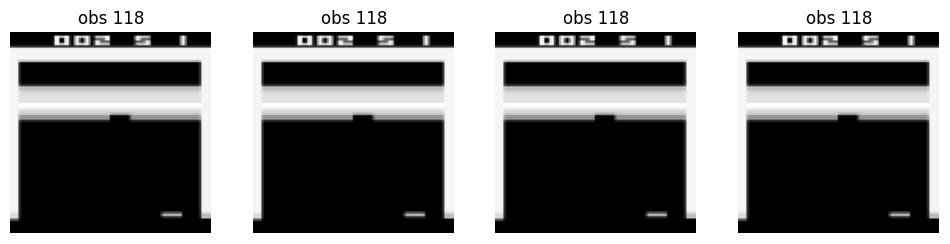

action 0 NOOP for step 119


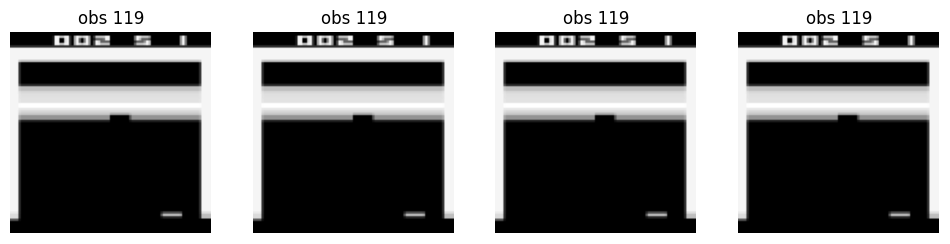

action 0 NOOP for step 120


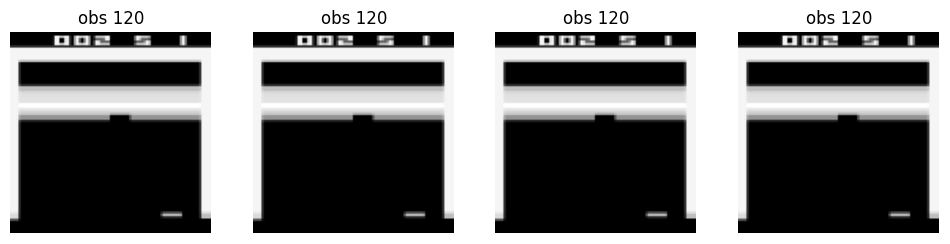

action 0 NOOP for step 121


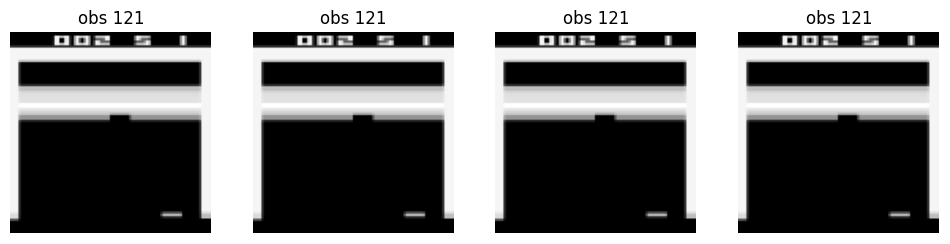

action 0 NOOP for step 122


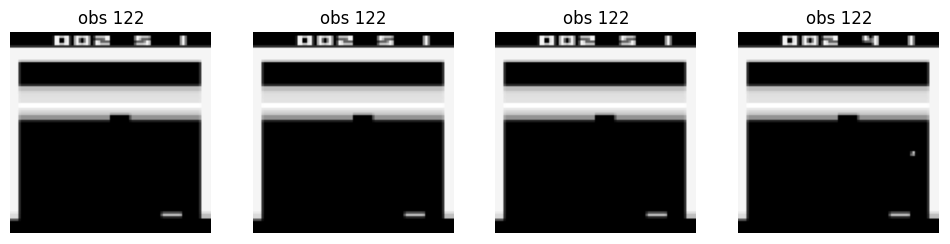

action 0 NOOP for step 123


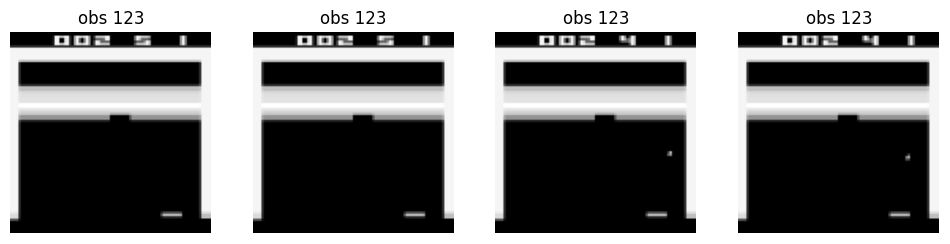

ValueError: invalid literal for int() with base 10: ''

In [7]:
step = 0
while True:
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))  # figsize: (weight, height)
    for i in range(cfg['env']['frame_stack']):
        # ori_img = np.einsum('chw->hwc', obs[i])
        ax_plot_img(ori_img=obs[i], ax=axes[i], title=f'obs {step}')
    plt.show()

    action = input('please input your action:')
    try:
        action = int(action)
    except:
        action = input('please input again, action:')
        action = int(action)
    step += 1
    print(f'action {action} {action_meaning[action]} for step {step}')
    next_o, r, terminated, truncated, env_info = env.step(action)
    obs = next_o


In [28]:
obs[i].shape

(84, 84)